In [1]:
import pandas as pd
import seaborn as sns

In [2]:
salary = pd.read_csv('avg_salary_per_year.csv', index_col='Unnamed: 0')
population = pd.read_csv('population_by_region.csv')
alco = pd.read_csv('low_alco_drinks_consumption.csv', index_col='Unnamed: 0')

In [3]:
alco.index = pd.date_range('01-2017', '11-2020', freq='m')
salary.index = pd.date_range('01-2017', '11-2020', freq='m')

In [4]:
salary.shape, population.shape, alco.shape

((46, 85), (85, 5), (46, 85))

In [5]:
salary.columns

Index(['Altajskij kraj', 'Amurskaja oblast'',
       'Arhangel'skaja obl. bez dannyh po Nenetskomu avt. okr.',
       'Astrahanskaja oblast'', 'Belgorodskaja oblast'', 'Brjanskaja oblast'',
       'Vladimirskaja oblast'', 'Volgogradskaja oblast'',
       'Vologodskaja oblast'', 'Voronezhskaja oblast'', 'g. Sevastopol'',
       'g. Moskva', 'g. Sankt-Peterburg', 'Evrejskaja avtonomnaja oblast'',
       'Zabajkal'skij kraj', 'Ivanovskaja oblast'', 'Irkutskaja oblast'',
       'Kabardino-Balkarskaja Respublika', 'Kaliningradskaja oblast'',
       'Kaluzhskaja oblast'', 'Kamchatskij kraj',
       'Karachaevo-Cherkesskaja Respublika', 'Kemerovskaja oblast'',
       'Kirovskaja oblast'', 'Kostromskaja oblast'', 'Krasnodarskij kraj',
       'Krasnojarskij kraj', 'Kurganskaja oblast'', 'Kurskaja oblast'',
       'Leningradskaja oblast'', 'Lipetskaja oblast'', 'Magadanskaja oblast'',
       'Moskovskaja oblast'', 'Murmanskaja oblast'',
       'Nenetskij avtonomnyj okrug (Arhangel'skaja oblast')

In [6]:
salary.head(5)

,Altajskij kraj,Amurskaja oblast',Arhangel'skaja obl. bez dannyh po Nenetskomu avt. okr.,Astrahanskaja oblast',Belgorodskaja oblast',Brjanskaja oblast',Vladimirskaja oblast',Volgogradskaja oblast',Vologodskaja oblast',Voronezhskaja oblast',...,Udmurtskaja Respublika,Ul'janovskaja oblast',Habarovskij kraj,Hanty-Mansijskij avtonomnyj okrug - Jugra (Tjumenskaja oblast'),Cheljabinskaja oblast',Chechenskaja Respublika,Chuvashskaja Respublika - Chuvashija,Chukotskij avtonomnyj okrug,Jamalo-Nenetskij avtonomnyj okrug (Tjumenskaja oblast'),Jaroslavskaja oblast'
2017-01-31,20302.0,32740.0,37493.0,24540.0,27550.0,22635.0,24681.0,25555.0,28067.0,25337.0,...,25694.0,24134.0,39583.0,58626.0,29264.0,21928.0,21789.0,80093.0,80260.0,27766.0
2017-02-28,20091.0,33136.0,37097.0,25925.0,26693.0,22548.0,25356.0,25539.0,31091.0,25419.0,...,26493.0,24069.0,39051.0,56903.0,29285.0,22825.0,21983.0,92452.0,82329.0,27890.0
2017-03-31,21817.0,35561.0,38003.0,27102.0,28213.0,23202.0,26488.0,26550.0,31794.0,27256.0,...,27216.0,25406.0,41693.0,64635.0,31040.0,23281.0,23506.0,92136.0,86741.0,29505.0
2017-04-30,21953.0,35184.0,39140.0,30942.0,28062.0,23591.0,27155.0,27104.0,29647.0,28035.0,...,28218.0,25353.0,41858.0,64768.0,32335.0,22768.0,23592.0,94719.0,110636.0,29847.0
2017-05-31,22504.0,37522.0,42973.0,28013.0,28444.0,25192.0,27799.0,28162.0,31055.0,28144.0,...,30134.0,26255.0,43023.0,74159.0,32727.0,22874.0,24743.0,94997.0,105617.0,31069.0


**Regions**: Vladimirskaja oblast' / Krasnodarskij kraj / Murmanskaja oblast' / Primorskij kraj / Respublika Saha (Jakutija)

In [7]:
regions = {0: "Vladimirskaja oblast'", 
           1: "Krasnodarskij kraj", 
           2: "Murmanskaja oblast'", 
           3: "Primorskij kraj", 
           4: "Respublika Saha (Jakutija)"}

In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [9]:
scaler = MinMaxScaler()
dataframes_regions = []

for i, r in regions.items():
    
    df = pd.concat([alco[r], salary[r]], axis=1)
    df.columns = ['alco', 'salary']

    df['alco_scaled'] = scaler.fit_transform(np.array(df['alco'].copy()).reshape( -1, 1))
    df['salary_scaled'] = scaler.fit_transform(np.array(df['salary'].copy()).reshape( -1, 1))
    df['region'] = [r for _ in range(df.shape[0])]
    
    dataframes_regions.append(df)

In [10]:
df = pd.concat(dataframes_regions, ignore_index=True)
df

,alco,salary,alco_scaled,salary_scaled,region
0,4.516,24681.0,0.019897,0.000000,Vladimirskaja oblast'
1,4.381,25356.0,0.000000,0.044335,Vladimirskaja oblast'
2,5.265,26488.0,0.130287,0.118686,Vladimirskaja oblast'
3,5.521,27155.0,0.168018,0.162496,Vladimirskaja oblast'
4,6.027,27799.0,0.242594,0.204795,Vladimirskaja oblast'
...,...,...,...,...,...
225,0.260,78149.0,0.430272,0.511096,Respublika Saha (Jakutija)
226,0.218,69018.0,0.358844,0.333806,Respublika Saha (Jakutija)
227,0.241,65392.0,0.397959,0.263402,Respublika Saha (Jakutija)
228,0.243,73711.0,0.401361,0.424927,Respublika Saha (Jakutija)


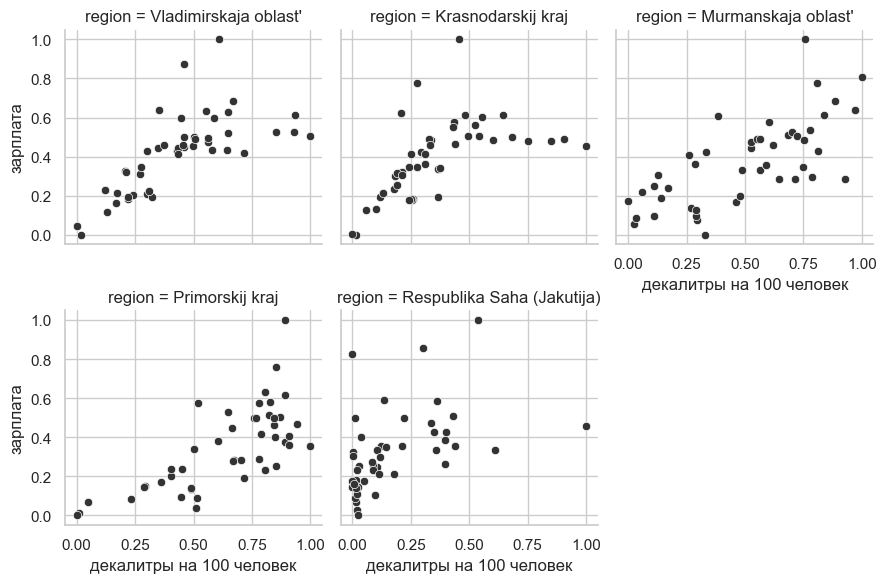

In [43]:
sns.set_style("whitegrid")


grid = sns.FacetGrid(df, col='region', col_wrap=3)
grid.map_dataframe(sns.scatterplot, x="alco_scaled", y="salary_scaled", color=".2", marker="o")
grid.set_axis_labels("декалитры на 100 человек", "зарплата")

In [11]:
def plot_consumers_for_all_periods(df, region, scale=True):
    fs = 15
    plt.figure(figsize=(17, 9))

    min_cons_value = df[region].min().min()
    max_cons_value = df[region].max().max()
        
    for i in region:
        plt.plot(df.index, df[i], label=i)
    plt.xticks(df.index, df.index.strftime("%B-%y"), rotation=90)

    plt.yticks(np.arange(0, np.ceil(max_cons_value)+1, 2.5))
    
    #years
    #years
    plt.fill_betweenx(np.arange(0, np.ceil(max_cons_value)+5), df.index[0], df.index[12], alpha=.25)
    plt.fill_betweenx(np.arange(0, np.ceil(max_cons_value)+5), df.index[12], df.index[24], alpha=.25)
    plt.fill_betweenx(np.arange(0, np.ceil(max_cons_value)+5), df.index[24], df.index[36], alpha=.25)
    plt.fill_betweenx(np.arange(0, np.ceil(max_cons_value)+5), df.index[36], df.index[45], alpha=.25)
    
    #seasons
    plt.axvline(df.index[1], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[4], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[7], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[10], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[13], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[16], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[19], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[22], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[25], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[28], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[31], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[34], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[37], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[40], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    plt.axvline(df.index[43], ymin=0, ymax=np.ceil(max_cons_value), alpha=.35, linestyle='--', c='gray')
    
    #years_text
    plt.text(df.index[5], np.ceil(max_cons_value)+4, '2017', fontsize=fs)
    plt.text(df.index[17], np.ceil(max_cons_value)+4, '2018', fontsize=fs)
    plt.text(df.index[29], np.ceil(max_cons_value)+4, '2019', fontsize=fs)
    plt.text(df.index[41], np.ceil(max_cons_value)+4, '2020', fontsize=fs)
    
    #season_text
    plt.text(df.index[2], np.ceil(max_cons_value)+1, 'sp', fontsize=fs-2)
    plt.text(df.index[5], np.ceil(max_cons_value)+1, 'su', fontsize=fs-2)
    plt.text(df.index[8], np.ceil(max_cons_value)+1, 'au', fontsize=fs-2)
    plt.text(df.index[11], np.ceil(max_cons_value)+1, 'wi', fontsize=fs-2)
    plt.text(df.index[14], np.ceil(max_cons_value)+1, 'sp', fontsize=fs-2)
    plt.text(df.index[17], np.ceil(max_cons_value)+1, 'su', fontsize=fs-2)
    plt.text(df.index[20], np.ceil(max_cons_value)+1, 'au', fontsize=fs-2)
    plt.text(df.index[23], np.ceil(max_cons_value)+1, 'wi', fontsize=fs-2)
    plt.text(df.index[26], np.ceil(max_cons_value)+1, 'sp', fontsize=fs-2)
    plt.text(df.index[29], np.ceil(max_cons_value)+1, 'su', fontsize=fs-2)
    plt.text(df.index[32], np.ceil(max_cons_value)+1, 'au', fontsize=fs-2)
    plt.text(df.index[35], np.ceil(max_cons_value)+1, 'wi', fontsize=fs-2)
    plt.text(df.index[38], np.ceil(max_cons_value)+1, 'sp', fontsize=fs-2)
    plt.text(df.index[41], np.ceil(max_cons_value)+1, 'su', fontsize=fs-2)
    plt.text(df.index[44], np.ceil(max_cons_value)+1, 'au', fontsize=fs-2)
    
    plt.legend(bbox_to_anchor=(1.1, .9))

In [12]:
import matplotlib.pyplot as plt

In [13]:
list(regions.values())

["Vladimirskaja oblast'",
 'Krasnodarskij kraj',
 "Murmanskaja oblast'",
 'Primorskij kraj',
 'Respublika Saha (Jakutija)']

Text(0.5, 1.0, 'Сравнение употребления алкоголя за 4 года')

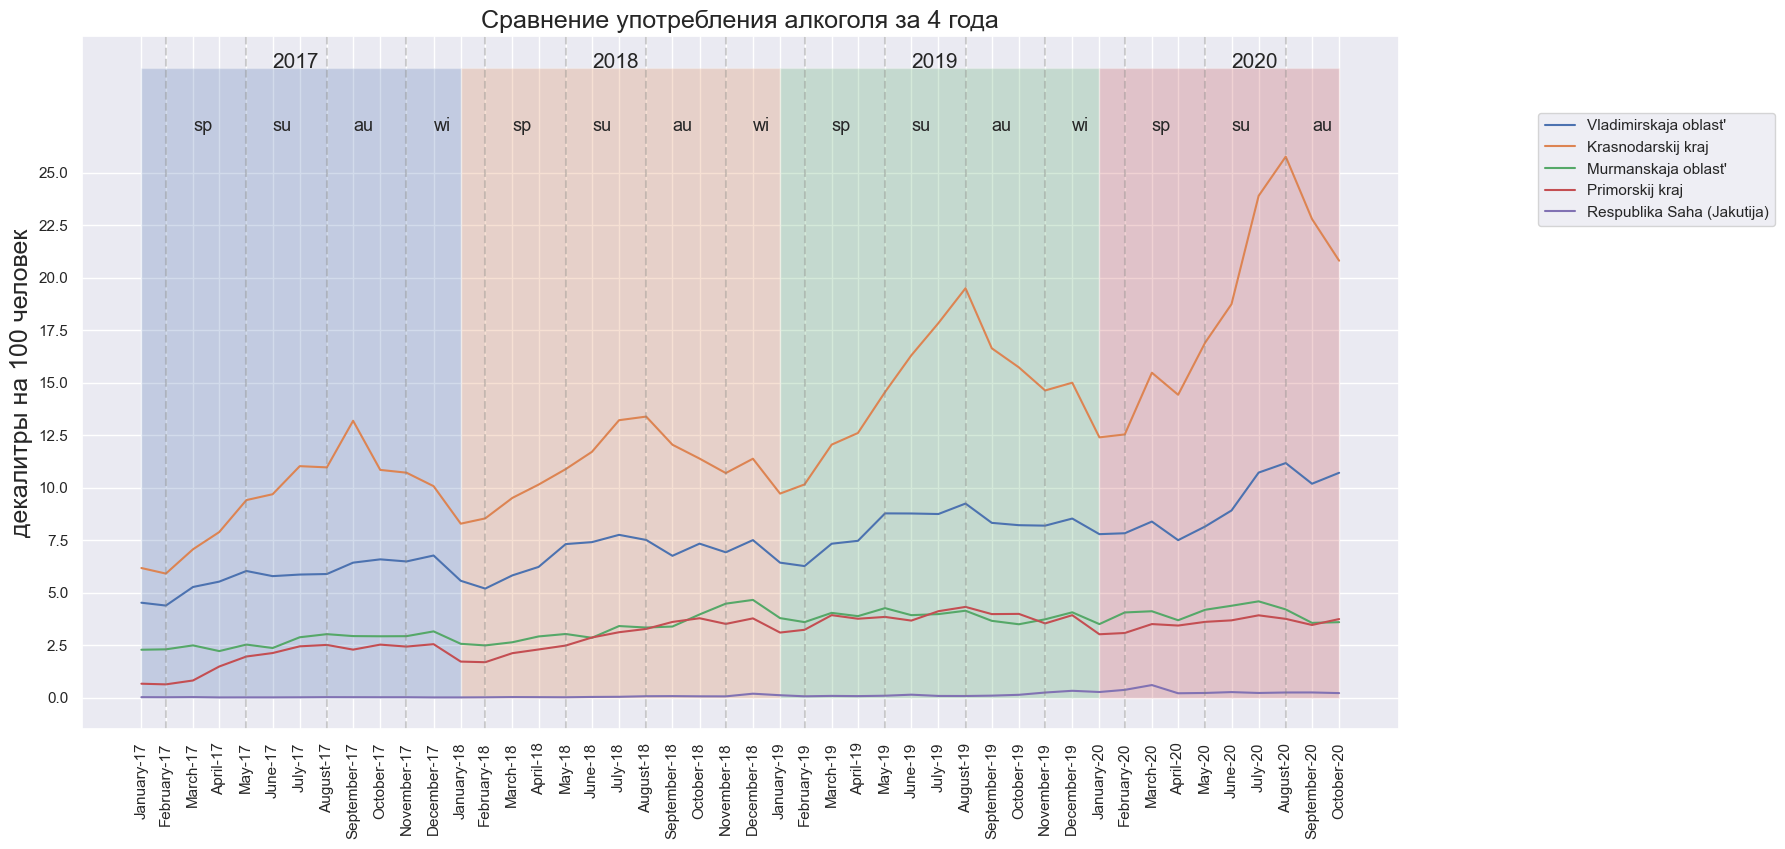

In [42]:
plot_consumers_for_all_periods(alco, list(regions.values()))
plt.ylabel('декалитры на 100 человек', fontsize=18)
plt.title('Сравнение употребления алкоголя за 4 года', fontsize=18)

In [16]:
alco_russia = pd.DataFrame(alco.mean(axis=1))
alco_russia.columns = ['decalitres']
alco_russia.head()

,decalitres
2017-01-31,3.343341
2017-02-28,3.328059
2017-03-31,3.903776
2017-04-30,3.962918
2017-05-31,4.283988


Text(0, 0.5, 'декалитры на 100 человек')

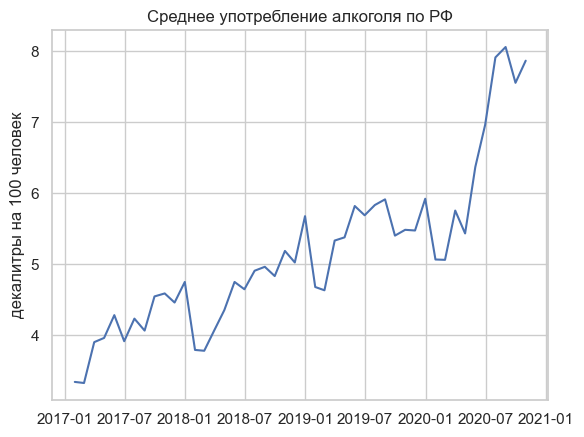

In [30]:
sns.set(font_scale = 1)
sns.set_style("whitegrid")
sns.lineplot(data=alco_russia, x=alco_russia.index, y=alco_russia['decalitres'])
plt.title('Среднее употребление алкоголя по РФ')
plt.ylabel('декалитры на 100 человек')

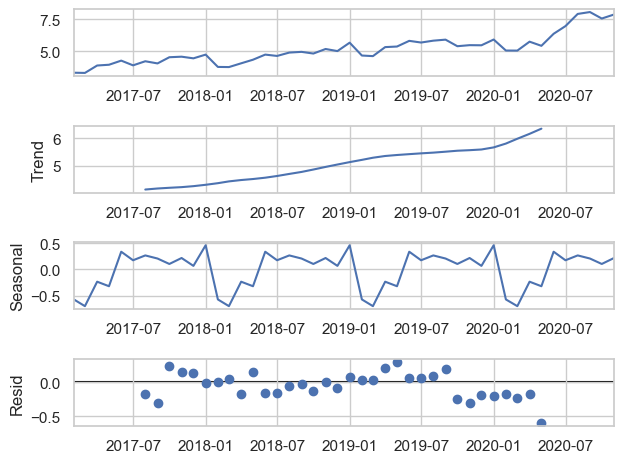

In [28]:
import statsmodels.api as sm

sns.set(font_scale = 1)
sns.set_style("whitegrid")
res = sm.tsa.seasonal_decompose(alco_russia)
resplot = res.plot()